# Future Sales Prediction (Case Study)

#### TV: Advertising cost spent in dollars for advertising on TV;
#### Radio: Advertising cost spent in dollars for advertising on Radio;
#### Newspaper: Advertising cost spent in dollars for advertising on Newspaper;
#### Sales: Number of units sold;

### import the required libraries

In [24]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### load the dataset using pandas

In [2]:
dataset = pd.read_csv('advertising.csv')

### just a glimpse of dataset

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### get the total number of rows & columns

In [4]:
dataset.shape

(200, 4)

### Check for null values

In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

hence, there is no missing values in this dataset

### Now let's visualize the relation of each item with the advertising cost

<AxesSubplot:xlabel='Sales', ylabel='TV'>

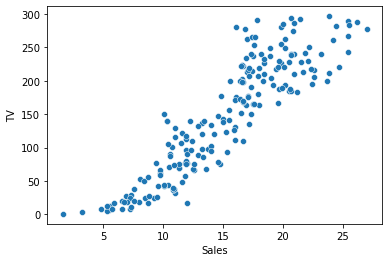

In [6]:
sb.scatterplot(x='Sales',y='TV',data=dataset)

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

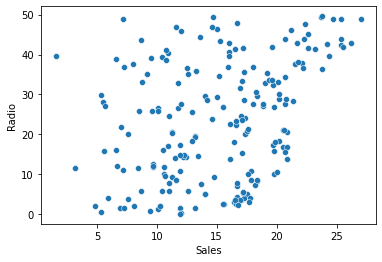

In [7]:
sb.scatterplot(x='Sales', y='Radio',data=dataset)

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

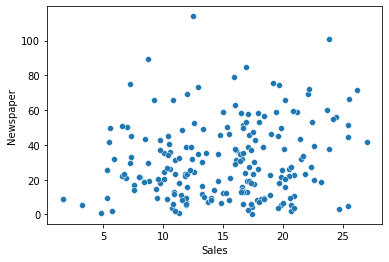

In [8]:
sb.scatterplot(x='Sales',y='Newspaper',data=dataset)

### let's get the Maximum spent on each item for their advertisiment

In [9]:
dataset[['TV','Sales']][dataset['Sales'] == dataset['Sales'].max()] # TV 

,TV,Sales
175,276.9,27.0


In [10]:
dataset[['Radio','Sales']][dataset['Sales'] == dataset['Sales'].max()] # radio

,Radio,Sales
175,48.9,27.0


In [11]:
dataset[['Newspaper','Sales']][dataset['Sales'] == dataset['Sales'].max()] # Newspaper

,Newspaper,Sales
175,41.8,27.0


# Now Segregate the feature and the target variable

In [12]:
X = dataset.drop('Sales',axis=1)
Y = dataset['Sales']

In [13]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [14]:
print(Y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


### Now let's Train & Test the data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(200, 3) (160, 3) (40, 3)


### Create a Linear Regression Model

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

### Check for Accuracy

In [19]:
model.score(X_train,Y_train)*100

91.20706464620405

91% accuracy in training

In [20]:
model.score(X_test,Y_test)*100

84.07131803267819

84% accuracy in testing

### now let's predict the values

In [25]:
prediction = model.predict(X_test)

In [28]:
cross_check = pd.DataFrame({'Actual ' : Y_test, 'Predicted ' : prediction})
cross_check

,Actual,Predicted
112,17.1,15.817942
29,10.5,10.150324
182,8.7,8.267378
199,18.4,18.255807
193,19.6,18.064664
85,20.2,17.243546
10,12.6,8.812945
54,20.2,22.045131
115,12.6,12.382082
35,17.8,21.036911


In [26]:
model.predict([[230.1,37.8,69.2]])

array([21.29072756])

In [ ]:
Conclusion :
    - It's a Linear Regression Model
    - It will predict sales on the advertisment of an item
    - This model is not predicting with 100% accuracy but not that bad prediction